# Black Friday Dataset EDA, Feature Engineering
Cleaning and Preparing the data for Model Training

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_test = pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
# Merging of Train and Test data
df = pd.concat([df_train,df_test])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.drop('User_ID',axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [8]:
#Handling the categorical feature - Gender
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [9]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
#Handling the categorical feature - Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [12]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
#Hnadling categorical variable - City_Category
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [14]:
df['City_Category'] = df['City_Category'].map({'A':1,'B':2,'C':3})

In [15]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,3,4+,0,8,NaN,NaN,7969.0


In [16]:
# Check for missing values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [17]:
# Focus on replacing the missing values 
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [18]:
# Replace the missing values with mode
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [19]:
df['Product_Category_2'].mode()[0]

8.0

In [20]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [21]:
df['Product_Category_2'].isnull().sum()

0

In [22]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [23]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [24]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [25]:
df['Product_Category_3'].isnull().sum()

0

In [26]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [27]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [28]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,3,4,0,8,8.0,16.0,7969.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 71.7+ MB


In [30]:
# Convert object into integer 
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int32(1), int64(6), object(1)
memory usage: 68.8+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

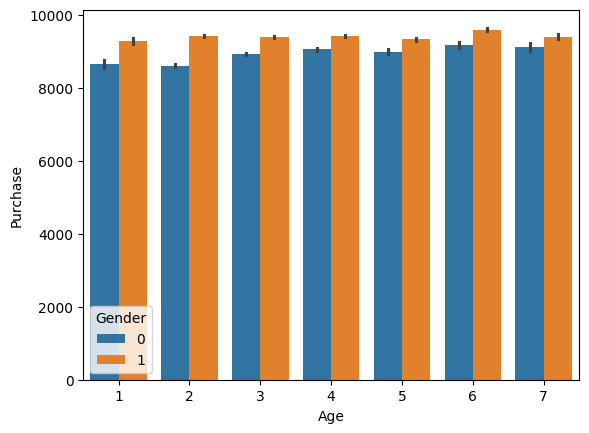

In [31]:
#Visualization of Age vs Purchased
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

# Observation:
Purchasing is higher in men than women

<Axes: xlabel='Occupation', ylabel='Purchase'>

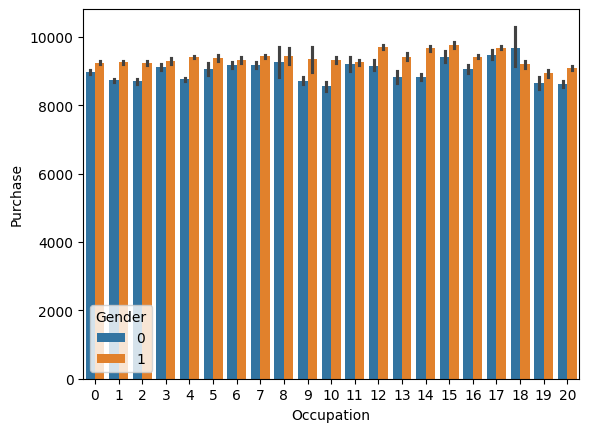

In [32]:
# Visualization of Purchase with Occupation
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

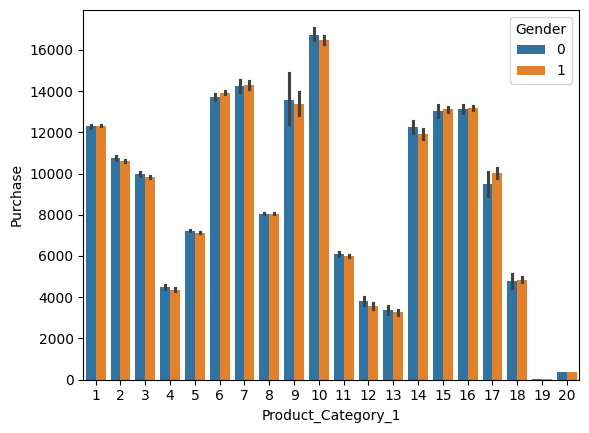

In [33]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

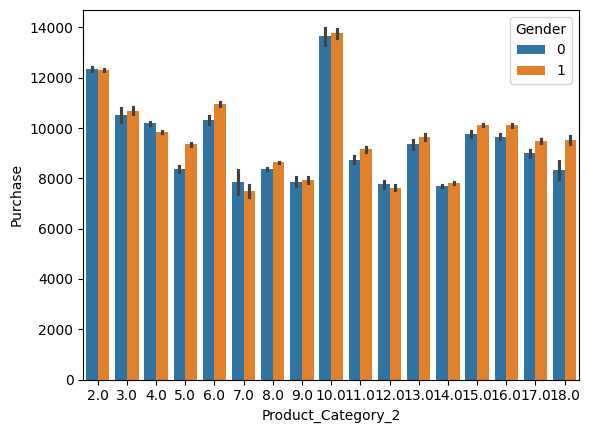

In [34]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

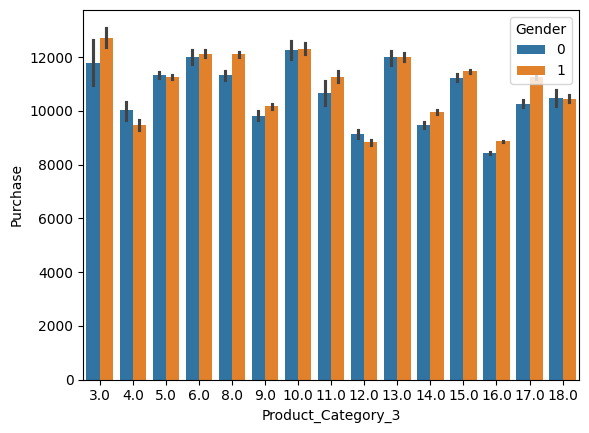

In [35]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

In [36]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,3,4,0,8,8.0,16.0,7969.0


In [37]:
df =  df.drop('Product_ID',axis=1)

In [38]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,1,7,16,3,4,0,8,8.0,16.0,7969.0


In [39]:
# Feature Scaling
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [40]:
df['Purchase'].value_counts()

Purchase
7011.0     191
7193.0     188
6855.0     187
6891.0     184
7012.0     183
          ... 
23491.0      1
18345.0      1
3372.0       1
855.0        1
21489.0      1
Name: count, Length: 18105, dtype: int64

In [41]:
df['Purchase'].mode()[0]

7011.0

In [42]:
df['Purchase']=df['Purchase'].fillna(df['Purchase'].mode()[0])

In [43]:
df['Purchase'].isnull().sum()

0

In [44]:
X = df.iloc[:,0:9]

In [45]:
X

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,1,10,1,2,0,3,8.0,16.0
1,0,1,10,1,2,0,1,6.0,14.0
2,0,1,10,1,2,0,12,8.0,16.0
3,0,1,10,1,2,0,12,14.0,16.0
4,1,7,16,3,4,0,8,8.0,16.0
...,...,...,...,...,...,...,...,...,...
233594,0,3,15,2,4,1,8,8.0,16.0
233595,0,3,15,2,4,1,5,8.0,16.0
233596,0,3,15,2,4,1,1,5.0,12.0
233597,0,5,1,3,4,0,10,16.0,16.0


In [46]:
y = df.iloc[:,-1]

In [47]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
233594     7011.0
233595     7011.0
233596     7011.0
233597     7011.0
233598     7011.0
Name: Purchase, Length: 783667, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [49]:
X_train.shape

(626933, 9)

In [50]:
X_test.shape

(156734, 9)

In [51]:
y_train.shape

(626933,)

In [52]:
y_test.shape

(156734,)

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [54]:
X_train = sc.fit_transform(X_train)

In [55]:
X_train

array([[ 0.57356773, -0.36703564, -1.23911366, ..., -1.12533518,
        -0.29474997,  0.36926519],
       [ 0.57356773, -1.10576719,  1.67302406, ..., -1.12533518,
        -1.68953266,  0.00472901],
       [-1.74347324,  1.84915902, -0.01295041, ...,  0.6778412 ,
         0.63510516,  0.36926519],
       ...,
       [-1.74347324,  1.11042747, -1.08584326, ...,  0.6778412 ,
        -0.29474997,  0.36926519],
       [ 0.57356773, -1.84449874,  0.2935904 , ..., -0.61014193,
        -1.22460509,  0.36926519],
       [ 0.57356773, -0.36703564, -0.16622082, ..., -0.09494868,
        -0.29474997,  0.36926519]])

In [56]:
X_test = sc.transform(X_test)

In [57]:
X_test

array([[-1.74347324,  1.84915902,  0.14032   , ..., -1.12533518,
         1.10003272,  0.36926519],
       [ 0.57356773, -0.36703564,  0.60013122, ..., -1.12533518,
         1.3324965 ,  0.36926519],
       [ 0.57356773, -1.84449874,  1.67302406, ..., -0.09494868,
         2.02988785,  0.36926519],
       ...,
       [ 0.57356773,  1.84915902,  0.60013122, ...,  0.16264795,
        -0.29474997, -0.72434335],
       [ 0.57356773, -1.10576719,  1.82629447, ..., -0.09494868,
         2.02988785,  0.36926519],
       [ 0.57356773,  0.37169592,  0.60013122, ..., -1.12533518,
        -1.68953266,  0.00472901]])